# Regressão Logística Binária

Para está atividade iremos utilizar um dataset sobre fraudes em cartão de crédito obtido do [kaggle](https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?select=card_transdata.csv).

Esse conjunto de dados possui as variáveis:

* distance_from_home - distância entre a casa e o local onde a transação foi feita.

* distance_from_last_transaction - a distância do local em que a última transação ocorreu.

* ratio_to_median_purchase_price - Razão entre preço da transação e o preço médio de transação.

* repeat_retailer - Se a transação ocorreu na mesma loja.

* used_chip - Se a transação foi feita com cartão de crédito.

* used_pin_number - Se a transação ocorreu usando número PIN.

* online_order - Se a transação foi online.

* fraud - Se a transação é fraudulenta.


## Atividade 1: Carregue os dados e verifique se há dados faltantes. Se houver, faça o tratamento que julgar adequado.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Carregando os dados novamente
df = pd.read_csv('card_transdata.csv')

df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [36]:
# Verificando a presença de valores ausentes
missing_values = df.isnull().sum()

missing_values

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Obs: Na célula abaixo há um código para renomear as colunas.

In [37]:
# renomeando as colunas
df.columns = ['dist_casa','dist_ultima_transacao','razao_preco_medio',
              'loja_repetida','usou_chip','usou_pin','online','fraude']

## Atividade 2: Selecione as variáveis que achar interessante para tentar prever se houve ou não fraude.

In [38]:
# Selecionando as variáveis para o modelo
selected_features = ['dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online']

# Criando um novo DataFrame com as variáveis selecionadas
df_selected = df[selected_features + ['fraude']]

df_selected.head()

,dist_casa,dist_ultima_transacao,razao_preco_medio,usou_chip,usou_pin,online,fraude
0,57.877857,0.311140,1.945940,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,0.0,1.0,0.0


## Atividade 3: Verifique se há desbalanceamento da variável `fraude`. Se houver, faça um balanceamento de classes.

In [39]:
# Verificando o balanceamento da variável 'fraude'
class_balance = df_selected['fraude'].value_counts()

class_balance

0.0    912597
1.0     87403
Name: fraude, dtype: int64

Se as classes estiverem desbalanceadas execute o código a seguir.

Existem várias técnicas de balanceamento. Como temos muitas observações, vamos usar uma técnica chamada undersampling. Esta técnica consiste em descartar observações da classe que possui mais observações até que as duas classes tenham a mesma quantidade.

Por exemplo, se temos duas classes, uma com 1000 observações para a classe A e outra com 100 observações para a classe B, então iremos selecionar apenas 100 observações (aleatoriamente) da classe A dentre as 1000. Dessa maneira iremos ter 100 observações de cada classe.

In [40]:
# separando as variáveis X e y
X = df[['dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online']]
y = df['fraude']

# balanceando as classes com undersampling
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')
X, y = undersample.fit_resample(X, y)

In [41]:
# Verificando o balanceamento da variável 'fraude'
class_balance = y.value_counts()

class_balance

0.0    87403
1.0    87403
Name: fraude, dtype: int64

## Atividade 4: Crie um modelo de regressão logística.

In [42]:
# Importando a biblioteca statsmodels
import statsmodels.api as sm

# Adicionando uma constante ao conjunto de treinamento
X1 = sm.add_constant(X)

# Criando o modelo de regressão logística
modelo = sm.Logit(y, X1).fit(method='newton')

# Imprimindo o resumo do modelo
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.221947
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:               174806
Model:                          Logit   Df Residuals:                   174799
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.6798
Time:                        19:49:30   Log-Likelihood:                -38798.
converged:                       True   LL-Null:                   -1.2117e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.1827      0.051   -158.997      0.000      -8.284      -8

In [43]:
# seu código

## Atividade 5: Verifique os parâmetros do modelo e se eles são relevantes.

In [44]:
modelo.params

const                   -8.182721
dist_casa                0.025354
dist_ultima_transacao    0.048297
razao_preco_medio        1.157847
usou_chip               -1.184084
usou_pin                -9.968379
online                   4.545755
dtype: float64

## Atividade 6: Crie a matriz de confusão e o mapa de calor correspondente.


In [45]:
modelo.predict(X1)

0         0.074504
1         0.064958
2         0.025455
3         0.000016
4         0.076998
            ...   
174801    0.999594
174802    0.725407
174803    0.506718
174804    1.000000
174805    0.999779
Length: 174806, dtype: float64

In [46]:
y_pred = (modelo.predict(X1) >= 0.5).astype(int)

In [47]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(y, y_pred)
matriz_confusao

array([[81341,  6062],
       [ 4426, 82977]])

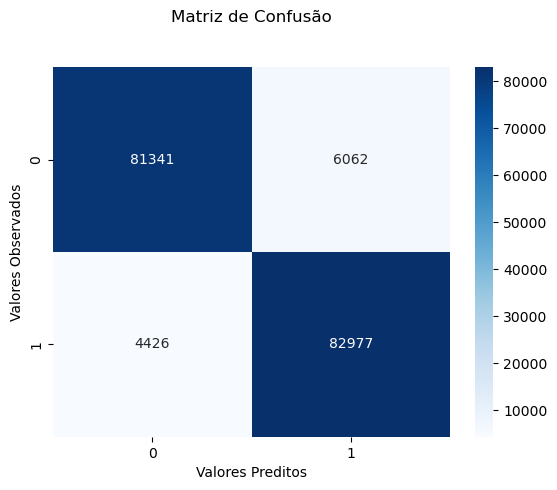

In [48]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

## Atividade 7: Verifique as outras métricas (sensibilidade, especificidade, f1-score).

In [49]:
from sklearn.metrics import classification_report

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94     87403
         1.0       0.93      0.95      0.94     87403

    accuracy                           0.94    174806
   macro avg       0.94      0.94      0.94    174806
weighted avg       0.94      0.94      0.94    174806



## Atividade 8: Crie a curva ROC para este modelo.

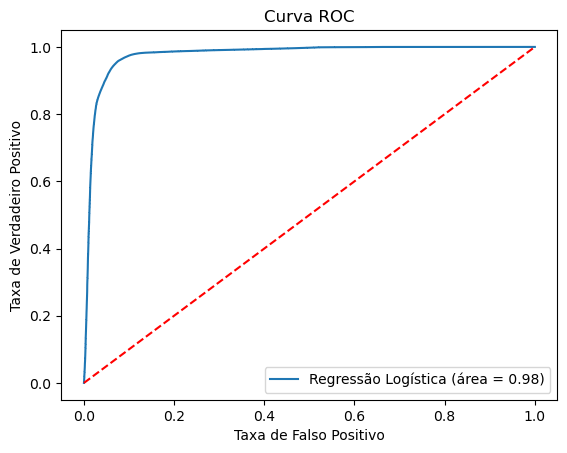

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y, modelo.predict(X1))
fpr, tpr, thresholds = roc_curve(y, modelo.predict(X1))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");

## Atividade 9: Preveja se uma transação com as características abaixo é ou não fraude.

* `dist_casa = 82`
* `dist_ultima_transacao = 13`
* `razao_preco_medio = 14`
* `loja_repetida = 1`
* `usou_chip = 0`
* `usou_pin = 0`
* `online = 1`

In [51]:
# Definindo as características da transação
transaction = pd.DataFrame(data=[[1, 82, 13, 14, 0, 0, 1]], 
                           columns=['const','dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online'])

# Fazendo a previsão com o modelo
fraud_prediction = modelo.predict(transaction)

fraud_prediction

0    1.0
dtype: float64

## Atividade 10: Refaça os exercícios sem realizar o balanceamento de classe e verifique se ocorre algum problema.

In [52]:
# separando as variáveis X e y
X = df[['dist_casa', 'dist_ultima_transacao', 'razao_preco_medio', 'usou_chip', 'usou_pin', 'online']]
y1 = df['fraude']

In [54]:
# Importando a biblioteca statsmodels
import statsmodels.api as sm

# Adicionando uma constante ao conjunto de treinamento
X2 = sm.add_constant(X)

# Criando o modelo de regressão logística
modelo2 = sm.Logit(y1, X2).fit(method='newton')

# Imprimindo o resumo do modelo
print(modelo2.summary())

Optimization terminated successfully.
         Current function value: 0.136423
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                 fraude   No. Observations:              1000000
Model:                          Logit   Df Residuals:                   999993
Method:                           MLE   Df Model:                            6
Date:                Sat, 05 Aug 2023   Pseudo R-squ.:                  0.5399
Time:                        19:50:19   Log-Likelihood:            -1.3642e+05
converged:                       True   LL-Null:                   -2.9649e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   -10.8148      0.042   -255.020      0.000     -10.898     -10

In [55]:
modelo2.params

const                   -10.814815
dist_casa                 0.014602
dist_ultima_transacao     0.025145
razao_preco_medio         0.857520
usou_chip                -1.042745
usou_pin                -13.623578
online                    6.587643
dtype: float64

In [56]:
modelo.predict(X2)

0         0.003571
1         0.001657
2         0.048625
3         0.016730
4         0.249804
            ...   
999995    0.000598
999996    0.004004
999997    0.011850
999998    0.048968
999999    0.052928
Length: 1000000, dtype: float64

In [58]:
y_pred2 = (modelo.predict(X2) >= 0.5).astype(int)

In [62]:
matriz_confusao = confusion_matrix(y1, y_pred2)
matriz_confusao

array([[850739,  61858],
       [  4426,  82977]])

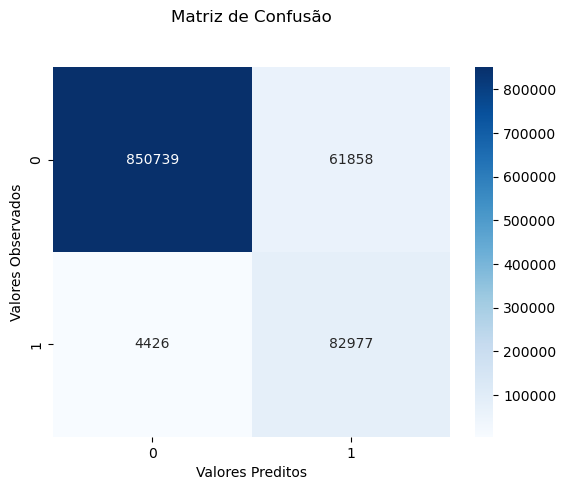

In [63]:
# criando mapa de calor
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão', y=1.1)
plt.ylabel('Valores Observados')
plt.xlabel('Valores Preditos');

In [64]:
from sklearn.metrics import classification_report

print(classification_report(y1, y_pred2))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    912597
         1.0       0.57      0.95      0.71     87403

    accuracy                           0.93   1000000
   macro avg       0.78      0.94      0.84   1000000
weighted avg       0.96      0.93      0.94   1000000



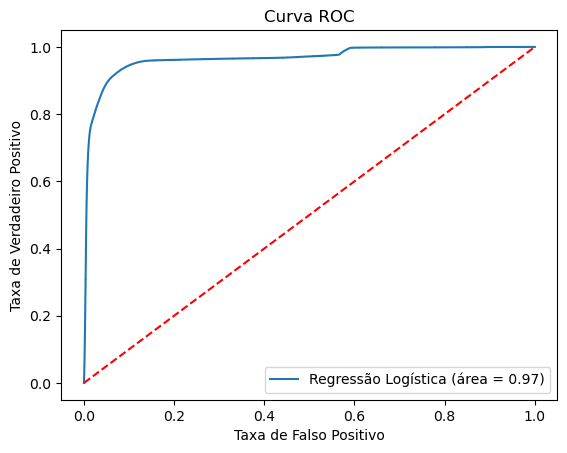

In [66]:
from sklearn.metrics import roc_curve, roc_auc_score

logit_roc_auc = roc_auc_score(y1, modelo2.predict(X2))
fpr, tpr, thresholds = roc_curve(y1, modelo2.predict(X2))
plt.plot(fpr, tpr, label=f'Regressão Logística (área = {round(logit_roc_auc, 2)})')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right");